In [1]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVR,SVC,NuSVC
import cv2
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from IPython import display
from sklearn.manifold import TSNE
import os

%matplotlib inline


In [2]:
def process_images_from_folder_HOG_only_gr(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)
            image = cv2.resize(image, (64,64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY )
            #print(image.ravel().shape)
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
            d = np.array(fd)
            image_vectors.append(d)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [3]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './data/non-vehicles/'
res_non_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle_HOG += process_images_from_folder_HOG_only_gr(path_using)
#res_non_vehicle_HOG

In [4]:
res_non_vehicle_HOG += process_images_from_folder_HOG_only_gr("./data/swimseg-2/train/")

In [5]:
#в скобочках просто path - если сделали импорт с кагла как выше - не нужно путь в кавычках прописывать
#res_non_vehicle_HOG += process_images_from_folder_HOG_only_gr("/home/mary/.cache/kagglehub/datasets/antigs/skyimage-dataset/versions/1")
'''res_non_vehicle_HOG += process_images_from_folder_HOG_only_gr('./data/swimseg-2/train')''' #path_k

"res_non_vehicle_HOG += process_images_from_folder_HOG_only_gr('./data/swimseg-2/train')"

In [6]:
import random
random.shuffle(res_non_vehicle_HOG)
res_non_vehicle_HOG = res_non_vehicle_HOG[:3500]
np.array(res_non_vehicle_HOG).shape


(3500, 1764)

In [7]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './data/vehicles/'
res_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle_HOG += process_images_from_folder_HOG_only_gr(path_using)
#res_vehicle_HOG


In [8]:
res_non_vehicle_HOG = np.array(res_non_vehicle_HOG)
res_vehicle_HOG = np.array(res_vehicle_HOG)

In [9]:
res_vehicle_HOG.shape

(3425, 1764)

In [10]:
res_non_vehicle_HOG.shape

(3500, 1764)

In [11]:
y = np.concatenate((np.ones(res_vehicle_HOG.shape[0]), np.zeros(res_non_vehicle_HOG.shape[0])))

In [12]:
X = np.vstack((res_vehicle_HOG, res_non_vehicle_HOG))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

(array([692.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 693.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

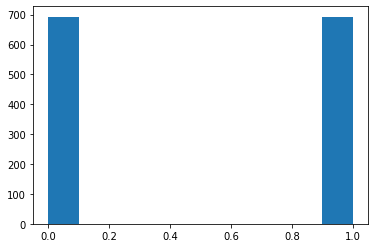

In [14]:
plt.hist(y_test)

(array([2808.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2732.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

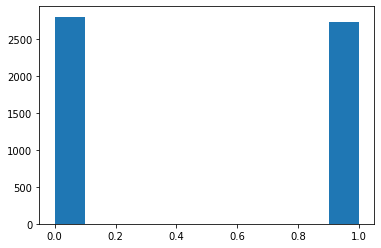

In [15]:
plt.hist(y_train)

In [16]:
model8 = SVC(kernel='rbf', gamma='scale', C = 5.0,probability=True)
model8.fit(X_train, y_train)

SVC(C=5.0, probability=True)

In [17]:
def metrics(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ac_score = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return cf_matrix, ac_score, prec, rec, f1

In [18]:
y_pred = model8.predict(X_test)

In [19]:
hog_metr = metrics(y_test, y_pred)

print(f"Accuracy Score with HOG features: {hog_metr[1]}")
print(f"Precision with HOG features: {hog_metr[2]}")
print(f"Recall with HOG features: {hog_metr[3]}")
print(f"F1 Score with HOG features: {hog_metr[4]}")

Accuracy Score with HOG features: 0.9891696750902527
Precision with HOG features: 0.9891788218663325
Recall with HOG features: 0.9891696750902527
F1 Score with HOG features: 0.9891696073375214


In [20]:
image_to_test = cv2.imread('./data/BDD_photos/highway.jpg')
image_to_test = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2RGB)
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

In [21]:
def sliding_window(image, window, step):
    for y in range(0, image.shape[0] - window[1], step):
        for x in range(0, image.shape[1] - window[0], step):
            yield (x, y, image[y:y + window[1], x:x + window[0]])

In [22]:
import time


In [23]:
(window_w, window_h) = (64,64)

# For using without SIFT

In [24]:
def create_bbox(image_gr, image_rgb): # для одного размера окошка
    heatmap = np.zeros((720,1280))
    for (x, y, window) in sliding_window(image_gr, (window_w, window_h), 20):
        if window.shape[0] != window_w or window.shape[1] != window_h:
            continue
        
        clone = image_gr.copy()
        inside = clone[y:y + window_h, x:x + window_w]
        im = cv2.resize(inside, (64,64))
        fd,_ = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
    
        pred = model8.predict_proba([fd])
        if pred[0][1] > 0.95:
            heatmap[y:y + window_w, x:x + window_w] += 10*pred[0][1]
    ret, thresh1 = cv2.threshold(heatmap, 150, 255, cv2.THRESH_BINARY) 
    contours, hierarchy = cv2.findContours(thresh1.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image_rgb


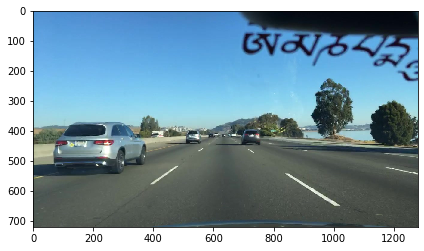

In [25]:
imshow(create_bbox(image_rgb,image_to_test))

In [26]:
def func_3_wind(image,model): # 3 размера окошка. строит heatmap (3 шт) и складывает их, устанавливая разные threshold
    heatmap70 = np.zeros((720,1280))
    heatmap140 = np.zeros((720,1280))
    heatmap200 = np.zeros((720,1280))

    window_w, window_h, step, weight = 70,70,10,50
    heatmap70 = take_heatmap(image,model,window_w,window_h,step,weight)

    window_w, window_h,step, weight = 200,200,40,10
    heatmap200 = take_heatmap(image,model,window_w,window_h,step,weight)


    window_w, window_h, step, weight = 140,140,35,20
    heatmap140 = take_heatmap(image,model,window_w,window_h,step,weight)


    ret200, thresh200 = cv2.threshold(heatmap200, np.max(heatmap200)*0.7, 180, cv2.THRESH_BINARY) #0.7 
    ret140, thresh140 = cv2.threshold(heatmap140, np.max(heatmap140)*0.5, 120, cv2.THRESH_BINARY) #0.5
    ret70, thresh70 = cv2.threshold(heatmap70, np.max(heatmap70)*0.6, 255, cv2.THRESH_BINARY) #0.6
    heatmap_sum = thresh200 + thresh140 + thresh70
    ret, thresh_sum = cv2.threshold(heatmap_sum, np.max(heatmap_sum)*0.4, 255, cv2.THRESH_BINARY) #0.4
    return thresh_sum

In [27]:
def func_3_wind_dice(image,model): # 3 размера окошка. строит heatmap (3 шт) и складывает их, устанавливая разные threshold
    heatmap70 = np.zeros((720,1280))
    heatmap140 = np.zeros((720,1280))
    heatmap200 = np.zeros((720,1280))

    heatmaps = []
    
    window_w, window_h, step, weight = 70,70,10,50
    heatmap70 = take_heatmap(image,model,window_w,window_h,step,weight)
    heatmaps.append(heatmap70)
    
    window_w, window_h,step, weight = 200,200,40,10
    heatmap200 = take_heatmap(image,model,window_w,window_h,step,weight)
    heatmaps.append(heatmap200)

    window_w, window_h, step, weight = 140,140,35,20
    heatmap140 = take_heatmap(image,model,window_w,window_h,step,weight)
    heatmaps.append(heatmap140)

    #ret200, thresh200 = cv2.threshold(heatmap200, np.max(heatmap200)*0.7, 180, cv2.THRESH_BINARY) #0.7 
    #ret140, thresh140 = cv2.threshold(heatmap140, np.max(heatmap140)*0.5, 120, cv2.THRESH_BINARY) #0.5
    #ret70, thresh70 = cv2.threshold(heatmap70, np.max(heatmap70)*0.6, 255, cv2.THRESH_BINARY) #0.6
    #heatmap_sum = thresh200 + thresh140 + thresh70
    #ret, thresh_sum = cv2.threshold(heatmap_sum, np.max(heatmap_sum)*0.4, 255, cv2.THRESH_BINARY) #0.4
    return heatmaps

In [28]:
def take_heatmap(image,model,window_w,window_h,step,weight,prob = 0.99):
    heatmap = np.zeros((720,1280))
    for (x, y, window) in sliding_window(image, (window_w, window_h), step):
        if window.shape[0] != window_w or window.shape[1] != window_h:
            continue
        
        clone = image.copy()
        inside = clone[y:y + window_h, x:x + window_w]
        im = cv2.resize(inside, (64,64))
        fd,_ = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
    
        pred = model.predict_proba([fd])
        if pred[0][1] > prob:
            heatmap[y:y + window_w, x:x + window_w] += weight
    return heatmap

In [29]:
def bbox_for_3_wind(image_gr, image_rgb,model): # строит bounding box по трем окошкам
    heatmap = np.zeros((720,1280))
    thresh_3w = func_3_wind(image_gr,model) 

    contours, hierarchy = cv2.findContours(thresh_3w.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image_rgb, thresh_3w


In [30]:
img_boxes,img_tr = bbox_for_3_wind(image_rgb,image_to_test,model8)

C:\anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


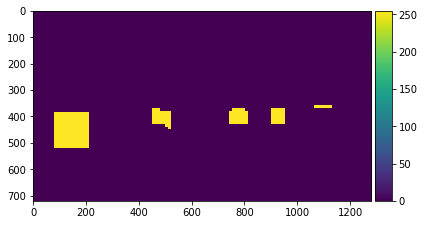

In [31]:
imshow(img_tr)

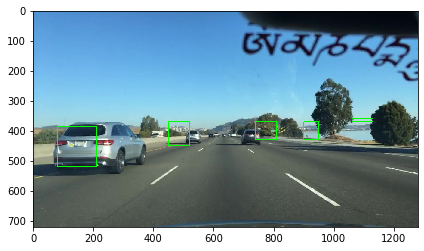

In [32]:
imshow(img_boxes)

In [33]:
def bbox_for_3_wind_upd(image_gr, image_rgb, model):
    heatmap = np.zeros((720, 1280))
    thresh_3w = func_3_wind1(image_gr, model)

    contours, hierarchy = cv2.findContours(thresh_3w.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bboxes = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        merged = False
        for i, bbox in enumerate(bboxes):
            x1, y1, w1, h1 = bbox
            if check_intersection(x, y, w, h, x1, y1, w1, h1):
                bboxes[i] = merge_bounding_boxes(x, y, w, h, x1, y1, w1, h1)
                merged = True
                break
        if not merged:
            bboxes.append((x, y, w, h))
    for bbox in bboxes:
        x, y, w, h = bbox
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_rgb, thresh_3w

In [34]:
def bbox_for_3_wind_dice(image_gr, image_rgb, model):
    #heatmap = np.zeros((720, 1280))
    bboxes = []
    heatmaps = func_3_wind_dice(image_gr, model)

    for heatmap in heatmaps:
        contours, hierarchy = cv2.findContours(heatmap.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            bboxes.append((x, y, w, h))
    merged_bboxes = merge_overlapping_bboxes_dice(bboxes)

    bboxes = remove_duplicates(bboxes)
    bboxes = filter_by_size(bboxes, min_size=20, max_size=150)
    bboxes = merge_close_bboxes(bboxes, threshold=10)
    image_fin = show_bboxes(image_rgb, merged_bboxes)
    return image_fin

In [35]:
def check_intersection_dice(bbox1, bbox2, dice_threshold):
    x11, y11, w11, h11 = bbox1
    x21, y21, w21, h21 = bbox2

    x_overlap = max(0, min(x11 + w11, x21 + w21) - max(x11, x21))
    y_overlap = max(0, min(y11 + h11, y21 + h21) - max(y11, y21))

    intersection_area = x_overlap * y_overlap

    area1 = w11 * h11
    area2 = w21 * h21

    dice = (2 * intersection_area) / (area1 + area2) #DICE

    return dice >= dice_threshold

In [36]:
'''def merge_bounding_boxes(bbox1, bbox2):
    x11, y11, w11, h11 = bbox1
    x21, y21, w21, h21 = bbox2
    x_min = min(x11, x21)
    y_min = min(y11, y21)
    x_max = max(x11 + w11, x21 + w21)
    y_max = max(y11 + h11, y21 + h21)

    return x_min, y_min, x_max - x_min, y_max - y_min'''

'def merge_bounding_boxes(bbox1, bbox2):\n    x11, y11, w11, h11 = bbox1\n    x21, y21, w21, h21 = bbox2\n    x_min = min(x11, x21)\n    y_min = min(y11, y21)\n    x_max = max(x11 + w11, x21 + w21)\n    y_max = max(y11 + h11, y21 + h21)\n\n    return x_min, y_min, x_max - x_min, y_max - y_min'

In [60]:
def merge_bounding_boxes(bbox1, bbox2):
    x11, y11, w11, h11 = bbox1
    x21, y21, w21, h21 = bbox2

    x_min = min(x11, x21)
    y_min = min(y11, y21)
    x_max = max(x11 + w11, x21 + w21)
    y_max = max(y11 + h11, y21 + h21)

    return x_min, y_min, x_max - x_min, y_max - y_min


In [61]:
def merge_overlapping_bboxes_dice(bboxes, dice_threshold=0.4):

    merged_bboxes = []
    i = 0
    while i < len(bboxes):
        bbox1 = bboxes[i]
        merged = False
        for j in range(i + 1, len(bboxes)):
            bbox2 = bboxes[j]
            if check_intersection_dice(bbox1, bbox2, dice_threshold):
                merged = True
                bbox1 = merge_bounding_boxes(bbox1, bbox2)
                bboxes.pop(j)  
                break 

        if merged:
            bboxes[i] = bbox1 
        else:
            merged_bboxes.append(bbox1)
            i += 1

    return merged_bboxes

In [62]:
def filter_by_size(bboxes, min_size=30, max_size=250):
    filtered_bboxes = []
    for bbox in bboxes:
        x, y, w, h = bbox
        if min_size <= w <= max_size and min_size <= h <= max_size:
            filtered_bboxes.append(bbox)
    return filtered_bboxes

In [63]:
def is_close(bbox1, bbox2, threshold):
    x1, y1, w1, h1 = bbox1
    x2, y2, w2, h2 = bbox2
    center_dist = np.sqrt(((x1 + w1 / 2) - (x2 + w2 / 2)) ** 2 + ((y1 + h1 / 2) - (y2 + h2 / 2)) ** 2)
    return center_dist < threshold 

In [64]:
def merge_close_bboxes(bboxes, threshold=10):
    merged_bboxes = []
    i = 0
    while i < len(bboxes):
        bbox1 = bboxes[i]
        merged = False
        for j in range(i + 1, len(bboxes)):
            bbox2 = bboxes[j]
            if is_close(bbox1, bbox2, threshold):
                merged = True
                bbox1 = merge_bboxes(bbox1, bbox2)
                bboxes.pop(j)
                break

        if merged:
            bboxes[i] = bbox1
        else:
            merged_bboxes.append(bbox1)
            i += 1
    return merged_bboxes

In [65]:
def remove_duplicates(bboxes):
    unique_bboxes = []
    for bbox in bboxes:
        if bbox not in unique_bboxes:
            unique_bboxes.append(bbox)
    return unique_bboxes

In [66]:
def show_bboxes(image_rgb, bboxes):

    for bbox in bboxes:
        x, y, w, h = bbox
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_rgb

In [67]:
image_to_test = cv2.imread('./data/BDD_photos/highway.jpg')
image_to_test = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2RGB)
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

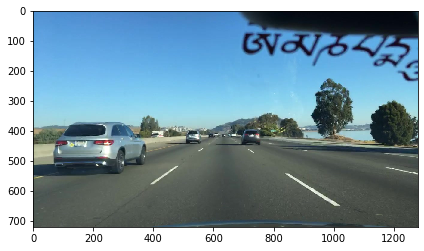

In [68]:
imshow(image_to_test)

In [69]:
img_boxes_1 = bbox_for_3_wind_dice(image_rgb, image_to_test, model8)

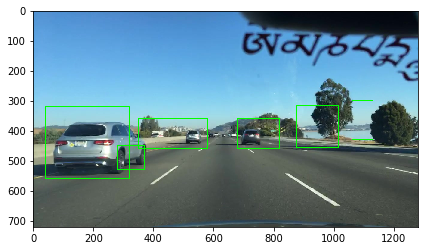

In [70]:
imshow(img_boxes_1)

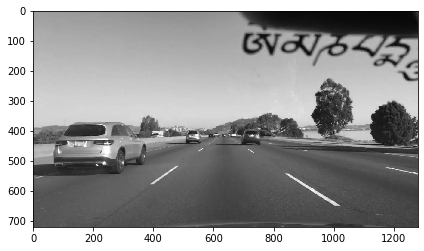

In [71]:
imshow(image_rgb)

In [78]:
filename = './data/BDD_videos/SanFrancisco.mov'
cap = cv2.VideoCapture(filename)
framesize = (int(1280), int(720))
fourcc = cv2.VideoWriter.fourcc(*'XVID')
out = cv2.VideoWriter(f"SF_3_bbox.avi", fourcc, 30.0, framesize, isColor=True)

if (cap.isOpened()== False): 
    print("Error opening video stream or file")
    
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        img_gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = bbox_for_3_wind_dice(img_gr,frame, model8)
        out.write(frame)
    
    else: 
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
filename = './data/BDD_videos/SanFrancisco.mov'
cap = cv2.VideoCapture(filename)

framesize = (int(1280), int(720))
fourcc = cv2.VideoWriter.fourcc(*'XVID')
out = cv2.VideoWriter(f"SF_version1.avi", fourcc, 1.0, framesize, isColor=True)

if (cap.isOpened()== False): 
    print("Error opening video stream or file")


i = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        i+=1
        if i % 30 == 0:
            img_gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame = bbox_for_3_wind_dice(img_gr, frame, model8)
        
            out.write(frame)
        
    else:  
        break

        
cap.release()
cv2.destroyAllWindows()


In [56]:
#(window_w, window_h) = (200,200)

In [38]:
#imshow(create_bbox(image_rgb,image_to_test))


In [39]:
# filename = './SanFrancisco_cut.mp4'
# cap = cv2.VideoCapture(filename)

# framesize = (int(1280), int(720))
# fourcc = cv2.VideoWriter.fourcc(*'XVID')
# out = cv2.VideoWriter(f"SF_3_bbox.avi", fourcc, 30.0, framesize, isColor=True)

# if (cap.isOpened()== False): 
#   print("Error opening video stream or file")
    
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == True:
#         img_gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         frame = bbox_for_3_wind(img_gr,frame)
#         out.write(frame)
    
#     else: 
#         break
 
# cap.release()
# cv2.destroyAllWindows()


# SIFT

In [21]:
def compute_sift_features(img, ndes=10):

    descr = np.zeros((ndes, 128), dtype=np.float64)
    sift = cv2.SIFT_create(ndes)
    kp, des = sift.detectAndCompute(img, None)
 
    if des is not None:  
        descr[:des.shape[0]] = des[:ndes]
    descr = descr / (np.max(descr) + np.finfo(np.float32).eps)
    
    return descr

In [22]:
def process_images_from_folder_HOG_SIFT(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)

            image = cv2.resize(image, (64,64))
            image_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            sift_features = compute_sift_features(image)

            #print(image.ravel().shape)
            fd, hog_image = hog(image_gr, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
            #print(np.ravel(sift_features).shape)
            d = np.array(fd)
            image_vectors.append(np.concatenate((d,np.ravel(np.array(sift_features)))))
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [35]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './data/non-vehicles/'
res_non_vehicle_HOG_sf = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle_HOG_sf += process_images_from_folder_HOG_SIFT(path_using)
res_non_vehicle_HOG_sf

[array([0.12497291, 0.1429561 , 0.30264343, ..., 0.        , 0.        ,
        0.        ]),
 array([0.26282519, 0.1496506 , 0.08919526, ..., 0.        , 0.        ,
        0.        ]),
 array([0.23742515, 0.05843104, 0.07391007, ..., 0.        , 0.        ,
        0.        ]),
 array([0.26495039, 0.18101367, 0.26495039, ..., 0.34640523, 0.1503268 ,
        0.02614379]),
 array([0.04994294, 0.0619662 , 0.        , ..., 0.232     , 0.032     ,
        0.        ]),
 array([0.02702282, 0.00318026, 0.03459162, ..., 0.        , 0.        ,
        0.        ]),
 array([0.24192671, 0.09220833, 0.08160981, ..., 0.        , 0.00568182,
        0.00568182]),
 array([0.11138727, 0.        , 0.15112543, ..., 0.03977273, 0.01136364,
        0.08522727]),
 array([0.02278325, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.3902909 , 0.00485292, 0.00544717, ..., 0.        , 0.        ,
        0.        ]),
 array([0.10737373, 0.06998718, 0.08629522, ..., 0

In [37]:
#res_non_vehicle_HOG_sf += process_images_from_folder_HOG_SIFT(("/home/mary/.cache/kagglehub/datasets/antigs/skyimage-dataset/versions/1"))
res_non_vehicle_HOG_sf += process_images_from_folder_HOG_SIFT((path_k))

In [38]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './data/vehicles/'
res_vehicle_HOG_sf = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle_HOG_sf += process_images_from_folder_HOG_SIFT(path_using)
res_vehicle_HOG_sf

[array([0.11435627, 0.29180915, 0.08197469, ..., 0.        , 0.        ,
        0.        ]),
 array([0.07925699, 0.22388533, 0.10954036, ..., 0.        , 0.00543478,
        0.6576087 ]),
 array([0.29077217, 0.23153665, 0.22385091, ..., 0.00636943, 0.08917197,
        0.        ]),
 array([0.08861315, 0.05124419, 0.02475879, ..., 0.03703704, 0.01851852,
        0.00617284]),
 array([0.07929463, 0.03242492, 0.00889216, ..., 0.5483871 , 0.04516129,
        0.02580645]),
 array([0.25252647, 0.25252647, 0.01927549, ..., 0.1875    , 0.15625   ,
        0.00625   ]),
 array([0.17152171, 0.25717439, 0.19695877, ..., 0.        , 0.        ,
        0.        ]),
 array([0.26834136, 0.02162506, 0.02051533, ..., 0.        , 0.        ,
        0.03225806]),
 array([0.34665132, 0.13961703, 0.07169471, ..., 0.        , 0.        ,
        0.        ]),
 array([0.27159896, 0.28626243, 0.19436989, ..., 0.        , 0.        ,
        0.        ]),
 array([0.27366985, 0.16292989, 0.12382482, ..., 0

In [39]:
res_non_vehicle_HOG_sf = np.array(res_non_vehicle_HOG_sf)
res_vehicle_HOG_sf = np.array(res_vehicle_HOG_sf)

In [40]:
y_sf = np.concatenate((np.ones(res_vehicle_HOG_sf.shape[0]), np.zeros(res_non_vehicle_HOG_sf.shape[0])))

In [41]:
X_sf = np.vstack((res_vehicle_HOG_sf, res_non_vehicle_HOG_sf))

In [42]:
X_sf_train, X_sf_test, y_sf_train, y_sf_test = train_test_split(X_sf, y_sf, test_size=0.2, random_state=42, shuffle=True)

In [43]:
model9 = SVC(kernel='rbf', gamma='scale', C = 5.0, probability=True)
model9.fit(X_sf_train, y_sf_train)

SVC(C=5.0, probability=True)

In [44]:
y_pred_sf = model9.predict(X_sf_test)

In [45]:
hog_metr_sf = metrics(y_sf_test, y_pred_sf)

print(f"Accuracy Score with HOG and SIFT features: {hog_metr_sf[1]}")
print(f"Precision with HOG and SIFT features: {hog_metr_sf[2]}")
print(f"Recall with HOG and SIFT features: {hog_metr_sf[3]}")
print(f"F1 Score with HOG and SIFT features: {hog_metr_sf[4]}")

Accuracy Score with HOG and SIFT features: 0.9815699658703072
Precision with HOG and SIFT features: 0.9816088337030615
Recall with HOG and SIFT features: 0.9815699658703072
F1 Score with HOG and SIFT features: 0.9815669568500526


In [46]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    sift_features = compute_sift_features(image_to_test[y:y + window_h, x:x + window_w])


    image_vectors = np.concatenate((fd,np.ravel(np.array(sift_features))))
    pred = model9.predict_proba([image_vectors])
    if pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_w, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]

    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    #clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)

KeyboardInterrupt: 

In [ ]:
imshow(heatmap/10)

# Тупо тестим на одной

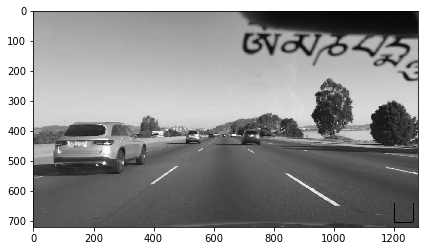

In [52]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model8.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)
